<a href="https://colab.research.google.com/github/ravidas07/DeepLearning/blob/main/Multi_Class_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multi-Class Classification

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Data Ingestion

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_weather.csv")


### Step 2 - Basic Data Quality checks

In [5]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [7]:
df.isna().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [8]:
df.duplicated().sum()

0

### Step 3 - Separate X and Y

In [11]:
X = df.drop(columns=["Weather Type"])
Y = df[["Weather Type"]]

In [12]:
X.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain


In [13]:
Y.head()

,Weather Type
0,Rainy
1,Cloudy
2,Sunny
3,Sunny
4,Rainy


In [14]:
X.dtypes

,0
Temperature,float64
Humidity,int64
Wind Speed,float64
Precipitation (%),float64
Cloud Cover,object
Atmospheric Pressure,float64
UV Index,int64
Season,object
Visibility (km),float64
Location,object


In [15]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

### Step 4 - Apply Preprocessing

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [19]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [22]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore",sparse_output = False)
)


In [23]:
pre = ColumnTransformer([
    ("num",num_pipe,con),
    ("cat",cat_pipe,cat)
]).set_output(transform="pandas")

In [24]:
X_pre = pre.fit_transform(X)

In [25]:
X_pre.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Step 5 - Train Test split

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=42)

In [28]:
xtrain.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
3958,0.740404,-0.134243,-0.554712,1.200664,0.117804,-0.520104,-1.175461,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2239,-0.237413,1.351385,0.169040,0.105042,0.299802,-1.038715,-0.433923,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3608,0.510330,-0.530410,-0.482337,-1.334918,0.525351,1.554340,1.049153,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6848,1.603184,0.757134,5.018179,0.981540,-0.364746,-0.520104,-1.027154,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6119,-0.064857,-0.134243,0.603291,-1.366221,-0.155596,-0.779410,0.752538,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
ytrain.head()

,Weather Type
3958,Rainy
2239,Rainy
3608,Sunny
6848,Rainy
6119,Cloudy


In [30]:
xtest.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
4111,0.222737,-1.520829,-0.771838,-1.491435,0.412980,1.295035,1.345768,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10607,2.465964,1.252343,0.675666,0.918933,0.530728,1.554340,-0.433923,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7372,1.200553,-0.877057,-1.133714,-1.303614,0.519437,1.035729,0.752538,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11786,-1.502823,0.509529,-0.482337,1.138057,-0.329798,-1.038715,-1.175461,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
12227,0.107699,1.252343,0.024290,1.732823,0.588257,1.813646,1.049153,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [31]:
ytest.head()

,Weather Type
4111,Sunny
10607,Sunny
7372,Sunny
11786,Snowy
12227,Sunny


In [32]:
xtrain.shape

(10560, 18)

In [33]:
xtest.shape

(2640, 18)






### for multiclass classification apply Onehotencoder

In [35]:
ohe = OneHotEncoder(handle_unknown="ignore",sparse_output=False).set_output(transform="pandas")

In [36]:
ytrain_pre = ohe.fit_transform(ytrain)
ytest_pre = ohe.transform(ytest)

In [38]:
ytrain_pre.head()

,Weather Type_Cloudy,Weather Type_Rainy,Weather Type_Snowy,Weather Type_Sunny
3958,0.0,1.0,0.0,0.0
2239,0.0,1.0,0.0,0.0
3608,0.0,0.0,0.0,1.0
6848,0.0,1.0,0.0,0.0
6119,1.0,0.0,0.0,0.0


In [40]:
ytest_pre.head()

,Weather Type_Cloudy,Weather Type_Rainy,Weather Type_Snowy,Weather Type_Sunny
4111,0.0,0.0,0.0,1.0
10607,0.0,0.0,0.0,1.0
7372,0.0,0.0,0.0,1.0
11786,0.0,0.0,1.0,0.0
12227,0.0,0.0,0.0,1.0


### Step 6 - Build Neural network


In [42]:
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.callbacks import EarlyStopping

In [43]:
# Initilize Model
model = Sequential()

#Add input layer
model.add(Input(shape=(xtrain.shape[1],)))

#Add Dense layer 1
model.add(Dense(units = 32,activation="relu"))
#Add dropout layer
model.add(Dropout(0.3))

#Add Dense layer 2
model.add(Dense(units = 16,activation="relu"))

#Add dropout layer
model.add(Dropout(0.2))

# For multi
model.add(Dense(units = ytrain_pre.shape[1],activation="softmax"))

In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,204 (4.70 KB)

 Trainable params: 1,204 (4.70 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [47]:
es = EarlyStopping(patience=10)

In [48]:
from gc import callbacks
hist = model.fit(xtrain, ytrain_pre, epochs=200, validation_split=0.2, callbacks = es)

Epoch 1/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5145 - loss: 1.1575 - val_accuracy: 0.8561 - val_loss: 0.5313
Epoch 2/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7929 - loss: 0.6483 - val_accuracy: 0.8826 - val_loss: 0.3828
Epoch 3/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8302 - loss: 0.5286 - val_accuracy: 0.8930 - val_loss: 0.3230
Epoch 4/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8617 - loss: 0.4347 - val_accuracy: 0.9001 - val_loss: 0.2913
Epoch 5/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8646 - loss: 0.4020 - val_accuracy: 0.9039 - val_loss: 0.2713
Epoch 6/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8705 - loss: 0.3602 - val_accuracy: 0.9058 - val_loss: 0.2557
Epoch 7/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8689 - loss: 0.3663 - val_accuracy: 0.9086 - val_loss: 0.2453
Epoch 8/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8795 - loss: 0.3337 - val_accu

### Check Learning curve

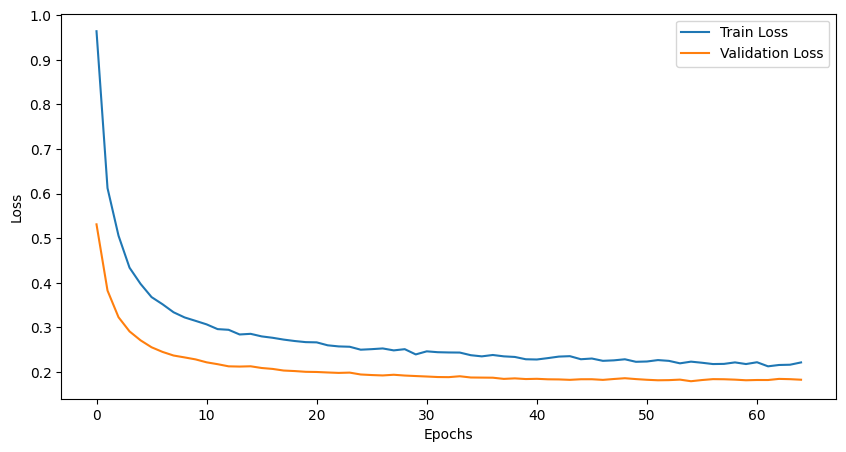

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [51]:
model.evaluate(xtrain,ytrain_pre)

330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9143 - loss: 0.1793


[0.17904254794120789, 0.913731038570404]

In [52]:
model.evaluate(xtest, ytest_pre)

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9115 - loss: 0.2124


[0.20417101681232452, 0.9102272987365723]

In [53]:
yprob_train = model.predict(xtrain)
yprob_train

330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[6.3275896e-02, 9.2561007e-01, 1.5279521e-03, 9.5860492e-03],
       [4.0944344e-03, 9.9569756e-01, 1.7117207e-04, 3.6845973e-05],
       [1.4289946e-16, 5.1304965e-26, 4.7133753e-21, 9.9999994e-01],
       ...,
       [9.9984384e-01, 5.6379650e-07, 2.1562605e-06, 1.5356699e-04],
       [8.8031542e-01, 6.0030263e-02, 2.3657084e-02, 3.5997108e-02],
       [1.2132552e-02, 9.8688090e-01, 5.4765178e-04, 4.3894656e-04]],
      dtype=float32)

In [54]:
ytrain_pre.columns

Index(['Weather Type_Cloudy', 'Weather Type_Rainy', 'Weather Type_Snowy',
       'Weather Type_Sunny'],
      dtype='object')

In [55]:
classes = [i.split("_")[1]for i in ytrain_pre.columns]
classes

['Cloudy', 'Rainy', 'Snowy', 'Sunny']

In [57]:
import numpy as np

In [58]:
yprob_index = np.argmax(yprob_train,axis=1)
yprob_index

array([1, 1, 3, ..., 0, 0, 1])

In [61]:
ypred_train = [classes[i] for i in yprob_index]
ypred_train[0:5]

['Rainy', 'Rainy', 'Sunny', 'Rainy', 'Cloudy']

In [62]:
ytrain.head()

,Weather Type
3958,Rainy
2239,Rainy
3608,Sunny
6848,Rainy
6119,Cloudy


In [63]:
def predict_result(model, x):
    yprob = model.predict(x)
    yprob_index = np.argmax(yprob,axis=1)
    ypred = [classes[i] for i in yprob_index]
    return ypred, yprob

In [64]:
ypred_test, yprob_test = predict_result(model, xtest)

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [65]:
ypred_test[0:5]

['Sunny', 'Sunny', 'Sunny', 'Snowy', 'Sunny']

In [66]:
ytest.head()

,Weather Type
4111,Sunny
10607,Sunny
7372,Sunny
11786,Snowy
12227,Sunny


### Plot Confusion matrix

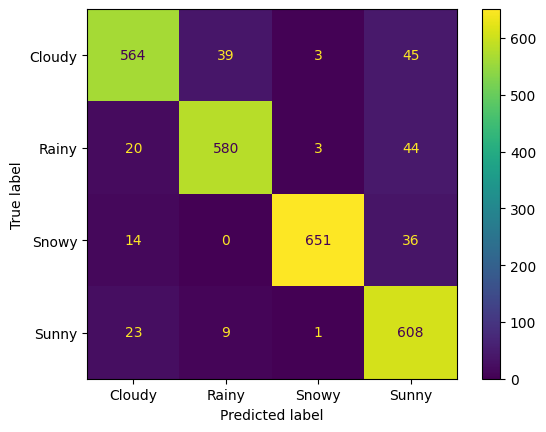

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      Cloudy       0.91      0.87      0.89       651
       Rainy       0.92      0.90      0.91       647
       Snowy       0.99      0.93      0.96       701
       Sunny       0.83      0.95      0.89       641

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



### Because F1 macro > 0.8 hence model is good for OSP

In [69]:
xnew = pd.read_csv("https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_weather.csv")

In [70]:
Xnew_pre = pre.transform(xnew)

In [71]:
Xnew_pre.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
0,-1.100192,-0.035201,0.892792,0.386773,-0.561530,-1.038715,-1.027154,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,5.054302,1.896115,0.748042,0.918933,0.246574,1.813646,0.455922,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.007338,0.360966,0.386166,-0.583634,0.307330,-0.001493,0.752538,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.165218,1.499948,1.254668,0.136346,0.184743,-1.038715,-0.582231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.797923,-2.164601,-0.265211,-1.491435,0.482338,0.517118,-0.137308,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [72]:
preds, probs = predict_result(model, Xnew_pre)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [73]:
preds[0:5]

['Snowy', 'Sunny', 'Cloudy', 'Rainy', 'Sunny']

In [74]:
probs[0:5]

array([[7.85476360e-08, 3.90734954e-07, 9.99999344e-01, 1.18446486e-07],
       [1.43298786e-02, 3.39954568e-04, 1.70578132e-04, 9.85159516e-01],
       [9.88209605e-01, 3.95514956e-03, 8.97715392e-04, 6.93763513e-03],
       [9.89440735e-03, 9.89551723e-01, 3.92272806e-04, 1.61557502e-04],
       [4.53507164e-05, 2.91450686e-08, 1.63726361e-06, 9.99952972e-01]],
      dtype=float32)

In [76]:
xnew["Weather Type"] = preds
xnew[classes]  = probs
xnew.round(4)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Cloudy,Rainy,Snowy,Sunny
0,0,68,16.0,66.0,overcast,984.94,0,Winter,2.0,mountain,Snowy,0.0000,0.0000,1.0000,0.0000
1,107,107,15.0,83.0,partly cloudy,1015.00,11,Summer,7.0,mountain,Sunny,0.0143,0.0003,0.0002,0.9852
2,19,76,12.5,35.0,partly cloudy,1017.26,4,Summer,8.0,inland,Cloudy,0.9882,0.0040,0.0009,0.0069
3,22,99,18.5,NaN,partly cloudy,1012.70,0,NaN,3.5,inland,Rainy,0.0099,0.9896,0.0004,0.0002
4,33,25,8.0,6.0,partly cloudy,1023.77,6,Spring,NaN,inland,Sunny,0.0000,0.0000,0.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,27,59,9.5,41.0,overcast,1001.39,4,Spring,8.0,mountain,Cloudy,0.9915,0.0066,0.0003,0.0017
96,73,82,47.0,107.0,overcast,1002.73,0,Winter,0.5,mountain,Rainy,0.0036,0.9964,0.0000,0.0000
97,2,60,3.0,70.0,overcast,994.19,0,Winter,2.0,mountain,Snowy,0.0000,0.0000,1.0000,0.0000
98,33,44,1.5,11.0,clear,1011.95,7,Summer,8.5,inland,Sunny,0.0000,0.0000,0.0000,1.0000


In [77]:
xnew

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Cloudy,Rainy,Snowy,Sunny
0,0,68,16.0,66.0,overcast,984.94,0,Winter,2.0,mountain,Snowy,7.854764e-08,3.907350e-07,9.999993e-01,1.184465e-07
1,107,107,15.0,83.0,partly cloudy,1015.00,11,Summer,7.0,mountain,Sunny,1.432988e-02,3.399546e-04,1.705781e-04,9.851595e-01
2,19,76,12.5,35.0,partly cloudy,1017.26,4,Summer,8.0,inland,Cloudy,9.882096e-01,3.955150e-03,8.977154e-04,6.937635e-03
3,22,99,18.5,NaN,partly cloudy,1012.70,0,NaN,3.5,inland,Rainy,9.894407e-03,9.895517e-01,3.922728e-04,1.615575e-04
4,33,25,8.0,6.0,partly cloudy,1023.77,6,Spring,NaN,inland,Sunny,4.535072e-05,2.914507e-08,1.637264e-06,9.999530e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,27,59,9.5,41.0,overcast,1001.39,4,Spring,8.0,mountain,Cloudy,9.914652e-01,6.614847e-03,2.611380e-04,1.658815e-03
96,73,82,47.0,107.0,overcast,1002.73,0,Winter,0.5,mountain,Rainy,3.576128e-03,9.964004e-01,3.356462e-06,2.019432e-05
97,2,60,3.0,70.0,overcast,994.19,0,Winter,2.0,mountain,Snowy,5.879330e-07,2.361006e-06,9.999962e-01,8.042323e-07
98,33,44,1.5,11.0,clear,1011.95,7,Summer,8.5,inland,Sunny,3.294869e-17,3.662685e-27,7.272143e-22,1.000000e+00


In [79]:
xnew["Weather Type"].value_counts()

,count
Weather Type,
Snowy,26
Rainy,26
Sunny,25
Cloudy,23


In [80]:
xnew.to_csv("Weather_result.csv",index=False)

In [84]:
model.save("weather_model.keras")

In [86]:
# Load Model
from keras.models import load_model
m = model = load_model("weather_model.keras")
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,614 (14.12 KB)

 Trainable params: 1,204 (4.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,410 (9.42 KB)